In [3]:
import pandas as pd

In [5]:
data = pd.read_csv('placement.csv')

In [7]:
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [9]:
data = data.iloc[:,1:]

In [11]:
data

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [13]:
import matplotlib.pyplot as plt

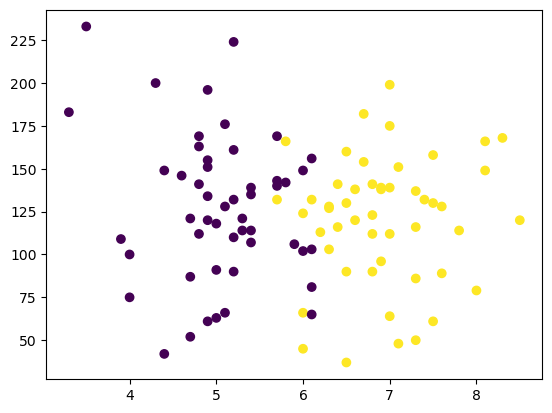

In [15]:
plt.scatter(data['cgpa'],data['iq'],c=data['placement'])

In [17]:
x = data.iloc[:,0:2]

In [19]:
y = data.iloc[:,-1]

In [21]:
x


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [23]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.1)

In [27]:
x_train

,cgpa,iq
9,5.1,66.0
80,4.9,196.0
24,4.7,121.0
62,6.0,102.0
13,6.4,116.0
...,...,...
95,4.3,200.0
66,6.9,96.0
51,4.8,141.0
86,5.1,128.0


In [28]:
x_test

,cgpa,iq
17,3.3,183.0
14,6.1,103.0
21,7.1,151.0
35,6.8,90.0
94,4.7,52.0
33,6.0,149.0
75,4.8,169.0
84,5.7,169.0
47,5.2,161.0
91,7.5,158.0


In [29]:
y_train

9     0
80    0
24    0
62    0
13    1
     ..
95    0
66    1
51    0
86    0
55    1
Name: placement, Length: 90, dtype: int64

In [30]:
y_test

17    0
14    0
21    1
35    1
94    0
33    0
75    0
84    0
47    0
91    1
Name: placement, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [41]:
x_train = scaler.fit_transform(x_train)

In [43]:
x_train

array([[-0.81774792, -1.42095332],
       [-0.99530477,  1.88227613],
       [-1.17286162, -0.02343317],
       [-0.01874211, -0.50621285],
       [ 0.33637158, -0.15048045],
       [-0.55141265,  0.43393707],
       [-0.64019108, -0.20129937],
       [ 1.1353774 , -0.15048045],
       [-0.01874211,  0.05279521],
       [-0.19629896,  1.11999241],
       [-0.99530477,  0.30688978],
       [ 0.7802637 ,  0.40852761],
       [ 2.20071848, -0.04884262],
       [ 1.22415582,  0.25607086],
       [ 1.40171267,  0.15443303],
       [-0.01874211, -1.42095332],
       [-0.7289695 , -0.3029372 ],
       [ 0.42515001,  0.96753567],
       [-1.26164004,  0.61180327],
       [ 1.84560479,  0.68803164],
       [ 0.07003631,  0.86589784],
       [-1.88308901, -0.32834665],
       [-1.43919689,  0.68803164],
       [ 0.07003631, -1.44636277],
       [ 0.86904213,  0.43393707],
       [ 0.42515001,  0.20525195],
       [-0.7289695 ,  2.59374093],
       [-0.81774792,  1.37408698],
       [-2.2382027 ,

In [45]:
x_test = scaler.transform(x_test)

In [47]:
x_test

array([[-2.41575955,  1.55195319],
       [ 0.07003631, -0.4808034 ],
       [ 0.95782055,  0.73885055],
       [ 0.69148528, -0.81112634],
       [-1.17286162, -1.77668572],
       [-0.01874211,  0.68803164],
       [-1.0840832 ,  1.19622078],
       [-0.28507738,  1.19622078],
       [-0.7289695 ,  0.99294513],
       [ 1.31293424,  0.91671675]])

In [49]:
from sklearn.linear_model import LogisticRegression

In [49]:
lgr = LogisticRegression()

In [51]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pre = lgr.predict(x_test)

In [55]:
y_test

36    0
40    0
79    1
74    1
78    0
48    1
44    1
15    0
4     0
46    0
Name: placement, dtype: int64

In [57]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,y_pre)

0.9

In [61]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

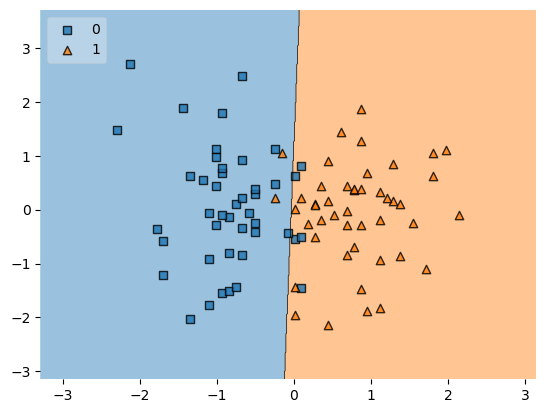

In [63]:
plot_decision_regions(x_train,y_train.values,clf = lgr , legend = 2)